In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
df.size

6912

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.isnull().values.any()

False

In [11]:
corrMtrix  = df.corr()

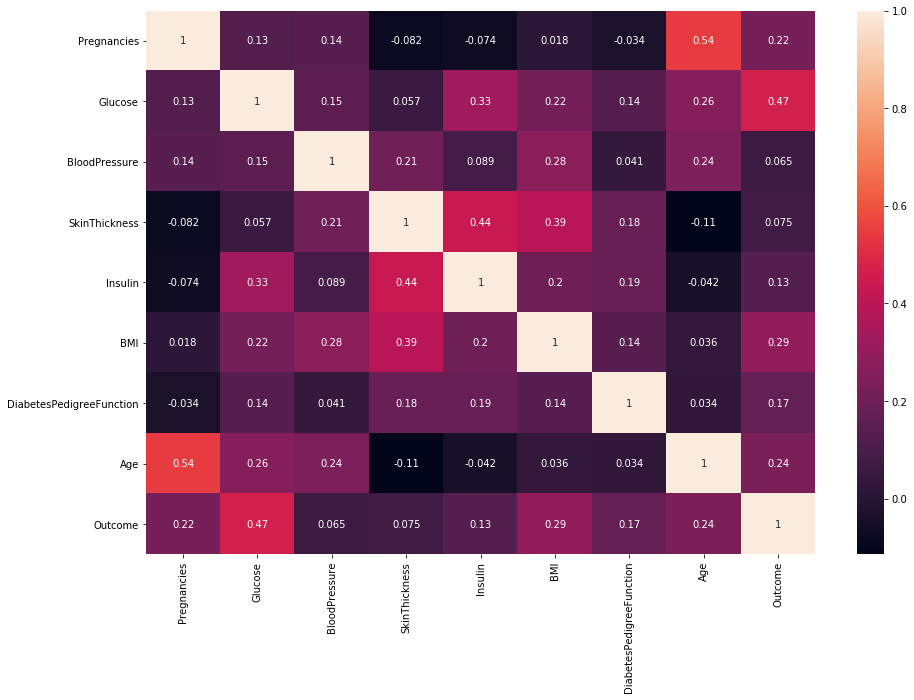

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(corrMtrix,annot=True)
plt.show()

# DATA VISUALIZATION

In [13]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

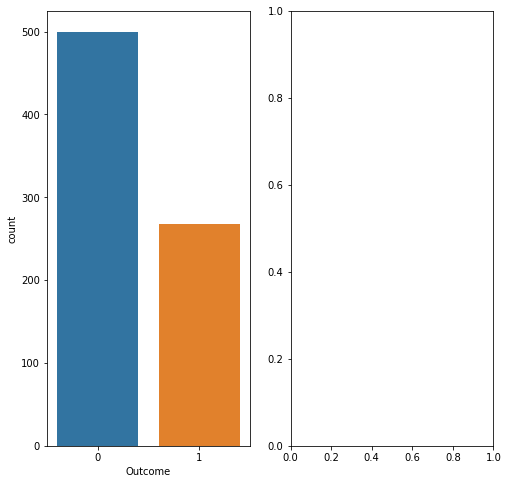

In [14]:
#plotting the frequency of outcome
ax0,ax1=plt.subplots(1,2,figsize=(8,8))
#count of observations in each category using bars
sns.countplot(df['Outcome'],ax=ax1[0])

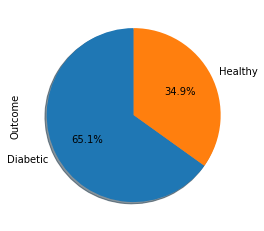

In [15]:
#% of diabetic and healthy person
label='Diabetic','Healthy'
df.Outcome.value_counts().plot.pie(labels=label,autopct='%1.1f%%',shadow=True,startangle=90)

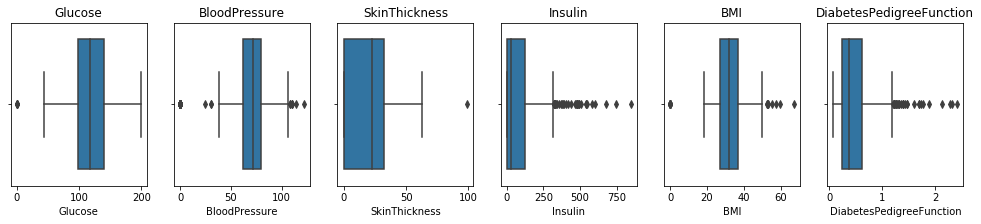

In [16]:
#Visualizing Outliners
fig=plt.figure(figsize=(20,3))
for i in np.arange(1,7):
    data=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

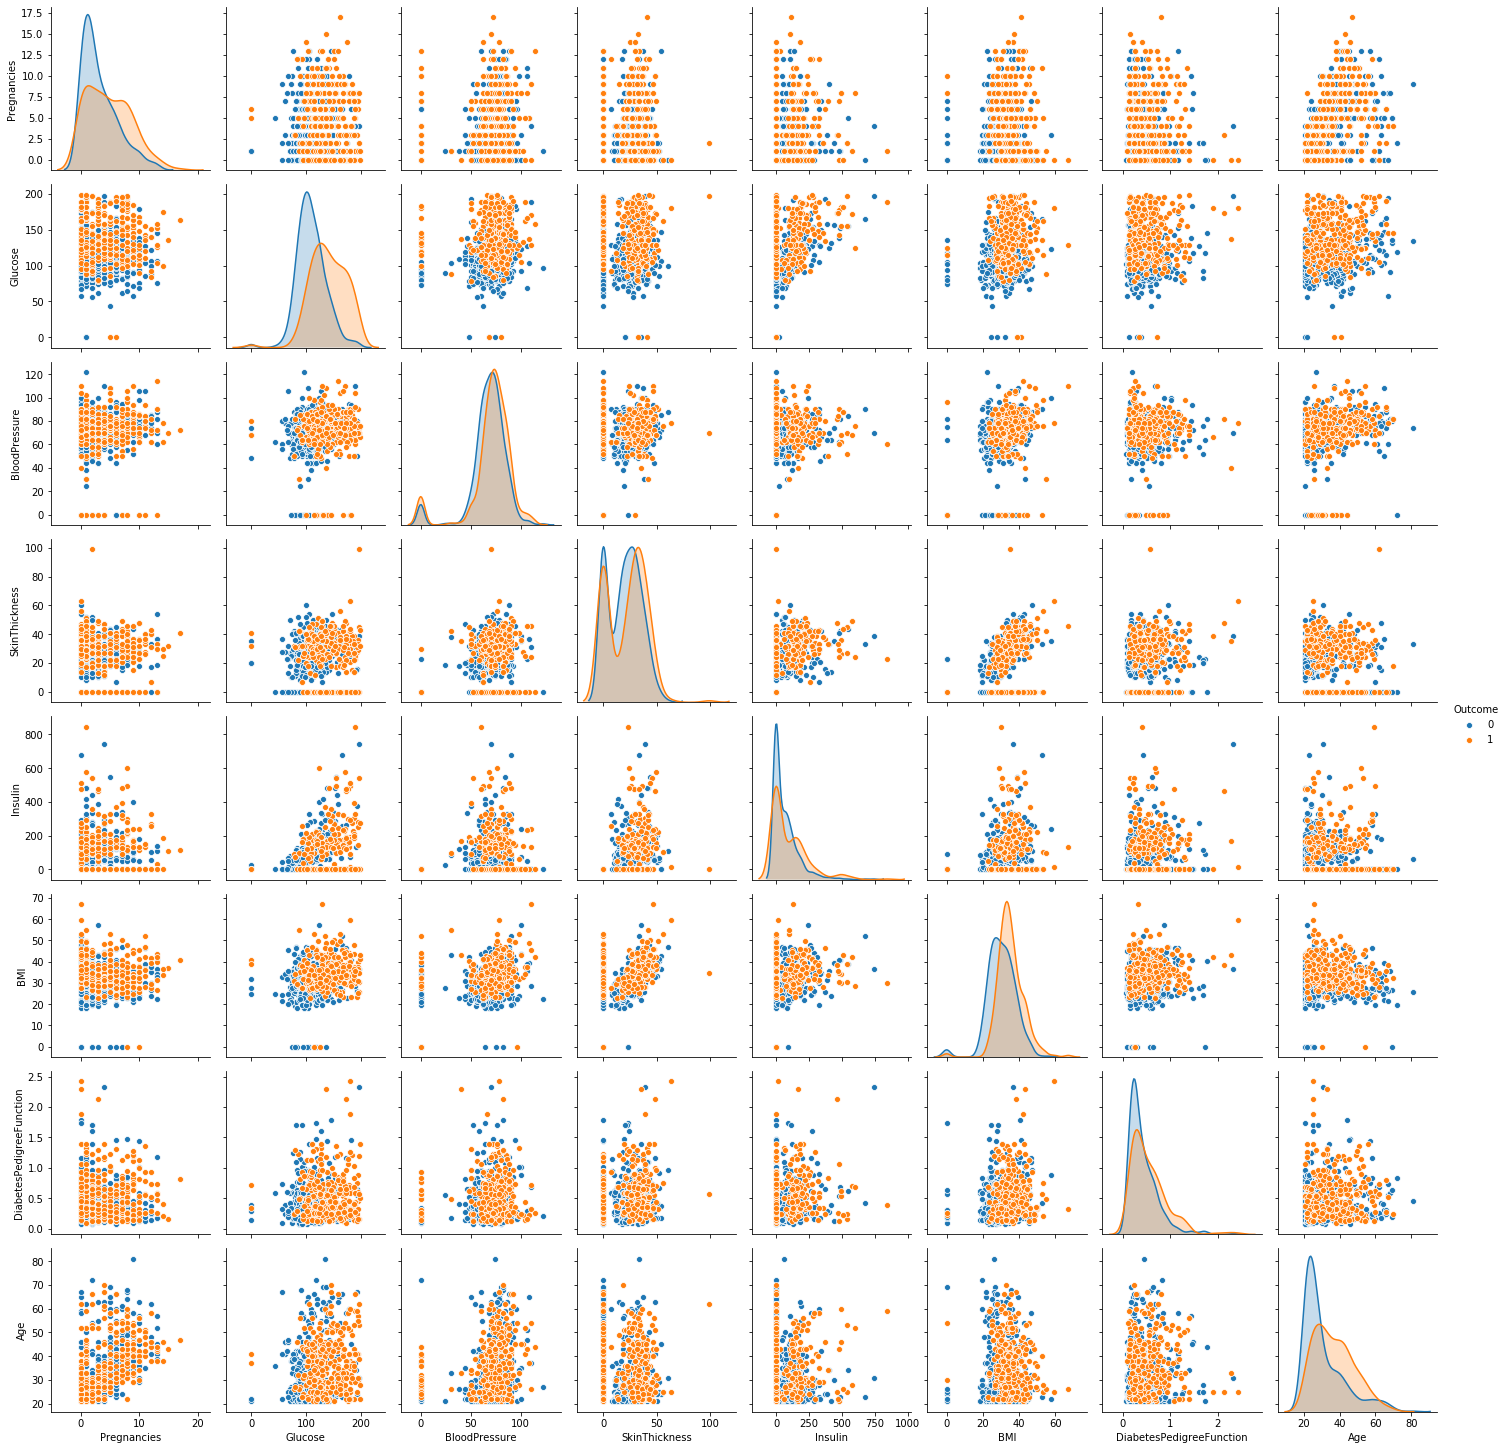

In [18]:
sns.pairplot(df,hue='Outcome')

In [19]:
#Analysis of 'Pregnancies' parameter
pd.crosstab(df['Pregnancies'],df['Outcome'])


Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


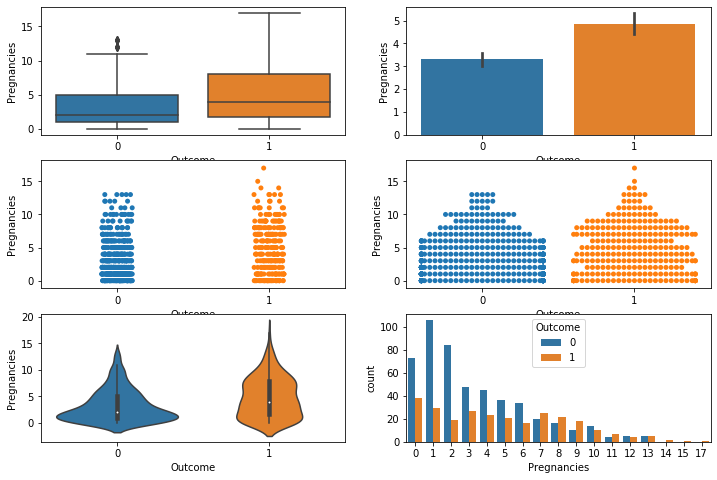

In [20]:
fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Pregnancies'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Pregnancies'], ax=ax2[1][1])
sns.violinplot(df['Outcome'], df['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=df,ax=ax2[2][1])

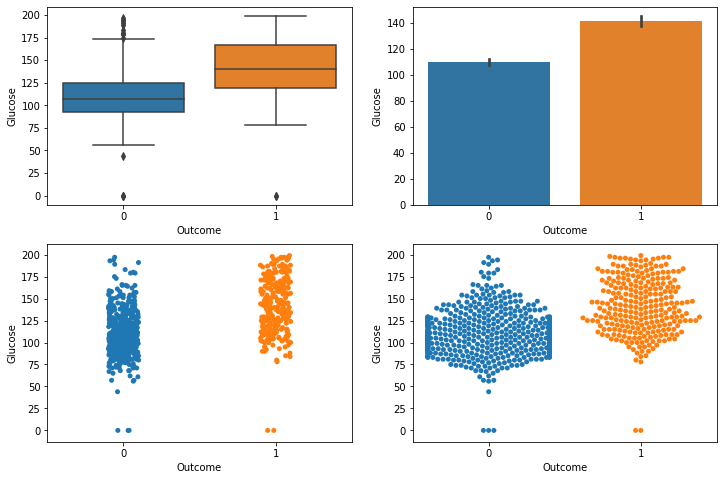

In [21]:
#Analysis of 'Glucose' parameter

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Glucose'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Glucose'], ax=ax2[1][1])

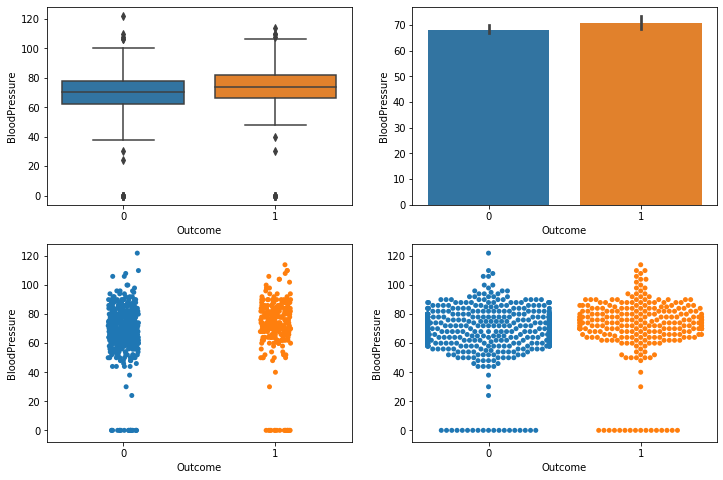

In [22]:
#Analysis of 'BloodPressure' parameter
fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BloodPressure'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BloodPressure'], ax=ax2[1][1])

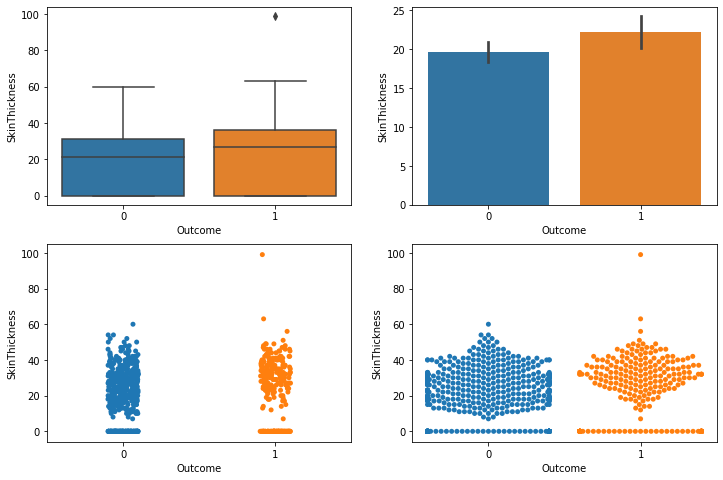

In [23]:
#Analysis of 'SkinThickness' parameter
 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['SkinThickness'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['SkinThickness'], ax=ax2[1][1])

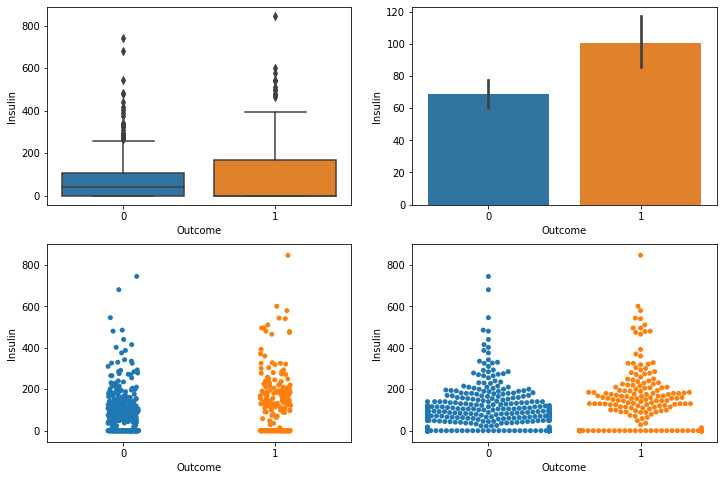

In [24]:
#Analysis of 'Insulin' parameter
 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Insulin'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Insulin'], ax=ax2[1][1])

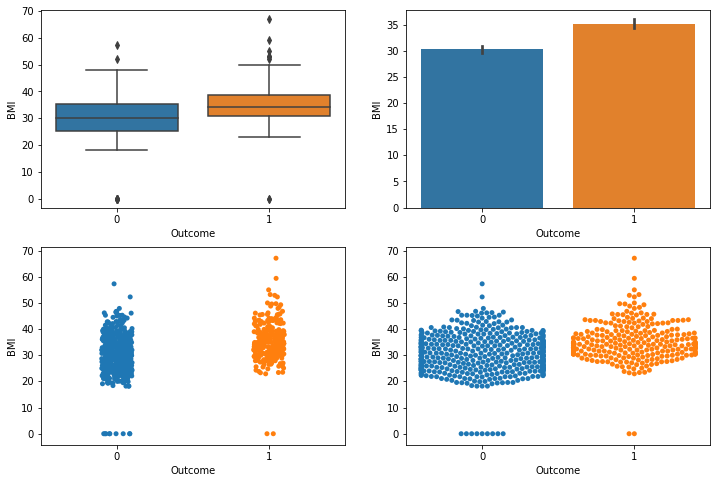

In [25]:
#Analysis of 'BMI' parameter


fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BMI'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BMI'], ax=ax2[1][1])

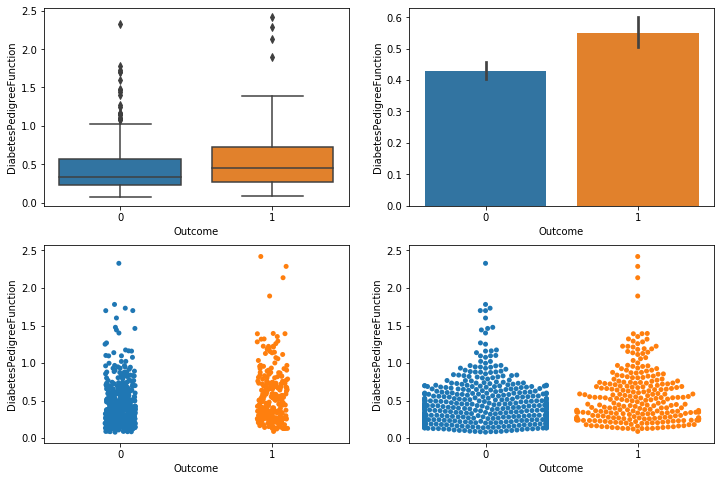

In [26]:
#Analysis of 'DiabetesPedigreeFunction' parameter


fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['DiabetesPedigreeFunction'], ax=ax2[1][1])

# Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
x = df.drop('Outcome',axis =1)
y = df['Outcome']
xtrain ,xtest , ytrain , ytest = train_test_split(x,y,test_size= 0.3)

In [28]:
xtrain.shape

(537, 8)

In [29]:
xtest.shape

(231, 8)

In [30]:
ytrain.shape

(537,)

In [31]:
ytest.shape

(231,)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                          object
Outcome                       int64
dtype: object

In [32]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == False])))

total number of rows : 768
number of rows missing glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing age: 0
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0


In [33]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")

xtrain= fill_values.fit(xtrain)
xtest = fill_values.fit_transform(xtest)

# Model Building

In [36]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(xtrain,ytrain)

ValueError: could not convert string to float: '>55'